# Time Series Deep Learning Predicting Stock Price


## In this notebook using the data from kaggle. The data contain the Tesla's Stock Price from 2010 to 2020

Import all the library needed

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Import the Data and look at the first 5 row

In [27]:
data=pd.read_csv('/content/TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Using info to look at the data

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


There are 7 column and all the data is not null

## PreProcessing the Data

In [45]:
df=data.copy()

Using copy as to not modify the real data

In [46]:
def make_date(row):
    return datetime(year = int(row.split('-')[0]), 
                    month = int(row.split('-')[1]), 
                    day = int(row.split('-')[2]))

change the object to datetime type using function and applpy it to dataframe

In [47]:
df['Date'] = df['Date'].apply(make_date)

In [48]:
df.set_index(df.Date,inplace=True)
df.drop(columns='Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Lets plot it to graph now

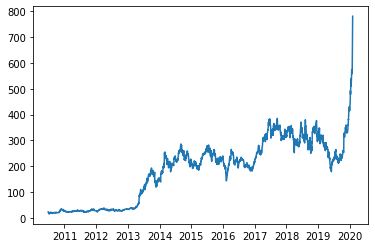

In [49]:
plt.plot(df['Close'])

Drop other column and set the date as index

In [50]:
df=df[['Close']]
df

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


## Deeplearning for Time Series

In this model will try using:


1.   simpleRNN
2.   LSTM

Using simpleRNN and choose other hyperparameter to find the best result. Then using the same parameter to find the result with LSTM model. Lets find Best model for SimpleRNN model now



### Split Train Test Data

In [51]:
testtime = 50
train = df[:len(df)-testtime]['Close'].values
test = df[len(train):]['Close'].values
train=train.reshape(train.shape[0],1)
test=test.reshape(test.shape[0],1)
MMS = MinMaxScaler(feature_range= (0,1))
train = MMS.fit_transform(train)
train_X = []
train_y = []

for i in range(testtime, train.shape[0]):
    train_X.append(train[i-testtime:i,0])
    train_y.append(train[i,0])

train_X = np.array(train_X)
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
train_y = np.array(train_y)
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))

Training input shape: (2316, 50, 1)
Training output shape: (2316,)


In [52]:
inputs = df[len(df) - len(test) - testtime:]
inputs = MMS.transform(inputs)

test_X = []

for i in range(testtime, 100):
    test_X.append(inputs[i-testtime:i,0])

test_X = np.array(test_X)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)

In [53]:
test_X.shape

(50, 50, 1)

### Model 1 SimpleRNN using Sigmoid

In [54]:
model_1 = Sequential() 
model_1.add(SimpleRNN(50, activation='sigmoid',
                    input_shape=(train_X.shape[1],1)))
model_1.add(Dense(1))
model_1.compile(loss='mean_squared_error', optimizer='adam')
model_1.fit(train_X, train_y, epochs=100, batch_size=64, verbose=0)

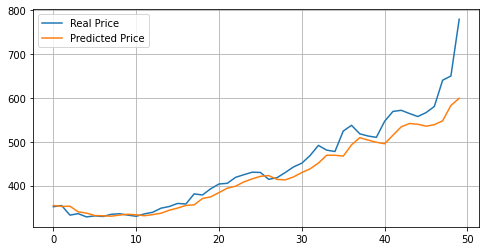

In [56]:
predicted = model_1.predict(test_X)
predicted = MMS.inverse_transform(predicted)
plt.figure(figsize=(8,4))
plt.plot(test,label="Real Price")
plt.plot(predicted,label="Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

### Model 2 SimpleRNN using Relu

In [57]:
model_2 = Sequential() 
model_2.add(SimpleRNN(50, activation='relu',
                    input_shape=(train_X.shape[1],1)))
model_2.add(Dense(1))
model_2.compile(loss='mean_squared_error', optimizer='adam')
model_2.fit(train_X, train_y, epochs=100, batch_size=64, verbose=0)

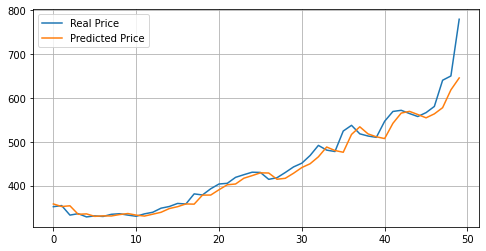

In [58]:
predicted = model_2.predict(test_X)
predicted = MMS.inverse_transform(predicted)
plt.figure(figsize=(8,4))
plt.plot(test,label="Real Price")
plt.plot(predicted,label="Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

### Model 3 SimpleRNN using Tnah

In [59]:
model_3 = Sequential() 
model_3.add(SimpleRNN(50, activation='tanh',
                    input_shape=(train_X.shape[1],1)))
model_3.add(Dense(1))
model_3.compile(loss='mean_squared_error', optimizer='adam')
model_3.fit(train_X, train_y, epochs=100, batch_size=64, verbose=0)

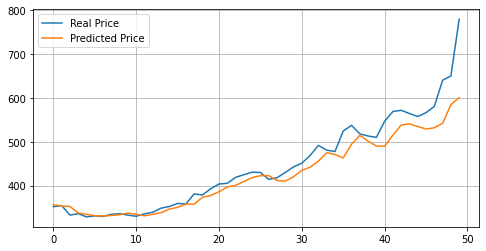

In [60]:
predicted = model_3.predict(test_X)
predicted = MMS.inverse_transform(predicted)
plt.figure(figsize=(8,4))
plt.plot(test,label="Real Price")
plt.plot(predicted,label="Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

### Model 4 Using Relu, add another layer and use dropout

In [64]:
model_4 = Sequential() 
model_4.add(SimpleRNN(50, activation='relu',
                    input_shape=(train_X.shape[1],1),return_sequences = True))
model_4.add(Dropout(0.5))
model_4.add(SimpleRNN(50, activation='relu'))
model_4.add(Dense(1))
model_4.compile(loss='mean_squared_error', optimizer='adam')
model_4.fit(train_X, train_y, epochs=100, batch_size=64, verbose=0)

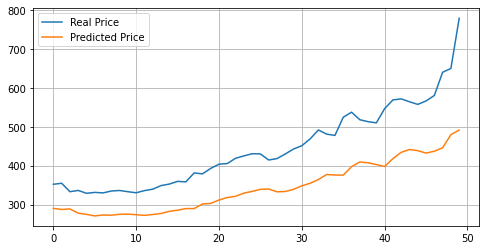

In [65]:
predicted = model_4.predict(test_X)
predicted = MMS.inverse_transform(predicted)
plt.figure(figsize=(8,4))
plt.plot(test,label="Real Price")
plt.plot(predicted,label="Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

### Model 5 Using Relu add another layer and not using dropout

In [72]:
model_5 = Sequential() 
model_5.add(SimpleRNN(50, activation='relu',
                    input_shape=(train_X.shape[1],1),return_sequences = True))
model_5.add(SimpleRNN(50, activation='relu'))
model_5.add(Dense(1))
model_5.compile(loss='mean_squared_error', optimizer='adam')
model_5.fit(train_X, train_y, epochs=100, batch_size=32, verbose=0)

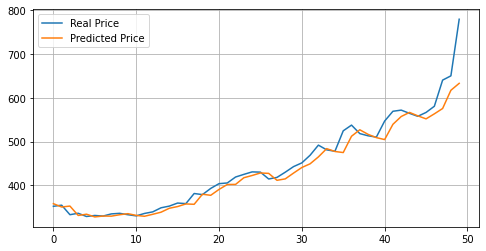

In [73]:
predicted = model_5.predict(test_X)
predicted = MMS.inverse_transform(predicted)
plt.figure(figsize=(8,4))
plt.plot(test,label="Real Price")
plt.plot(predicted,label="Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

### Model 6 Using Relu add another layer and another layer of dropout

In [78]:
model_6 = Sequential() 
model_6.add(SimpleRNN(50, activation='relu',
                    input_shape=(train_X.shape[1],1),return_sequences = True))
model_6.add(Dropout(0.1))
model_6.add(SimpleRNN(50, activation='relu',return_sequences = True))
model_6.add(Dropout(0.1))
model_6.add(SimpleRNN(50, activation='relu'))
model_6.add(Dense(1))
model_6.compile(loss='mean_squared_error', optimizer='adam')
model_6.fit(train_X, train_y, epochs=100, batch_size=32, verbose=0)

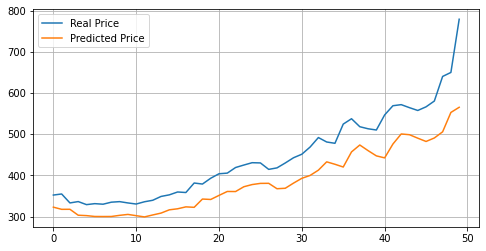

In [79]:
predicted = model_6.predict(test_X)
predicted = MMS.inverse_transform(predicted)
plt.figure(figsize=(8,4))
plt.plot(test,label="Real Price")
plt.plot(predicted,label="Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

### Model 7 LSTM using Relu

In [80]:
model_7 = Sequential() 
model_7.add(LSTM(50, activation='relu',
                    input_shape=(train_X.shape[1],1)))
model_7.add(Dense(1))
model_7.compile(loss='mean_squared_error', optimizer='adam')
model_7.fit(train_X, train_y, epochs=100, batch_size=64, verbose=0)

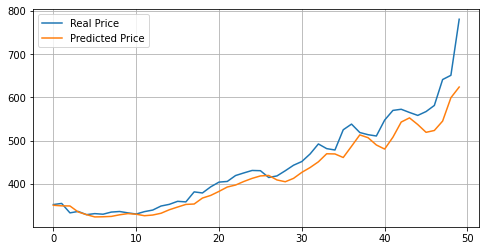

In [81]:
predicted = model_7.predict(test_X)
predicted = MMS.inverse_transform(predicted)
plt.figure(figsize=(8,4))
plt.plot(test,label="Real Price")
plt.plot(predicted,label="Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

In [87]:
model_8 = Sequential() 
model_8.add(LSTM(50, activation='tanh',
                    input_shape=(train_X.shape[1],1),return_sequences = True))
model_8.add(LSTM(50, activation='tanh',return_sequences = True))
model_8.add(LSTM(50, activation='tanh',return_sequences = True))
model_8.add(Dense(1))
model_8.compile(loss='mean_squared_error', optimizer='adam')
model_8.fit(train_X, train_y, epochs=100, batch_size=64, verbose=0)

In [88]:
predicted = model_8.predict(test_X)
predicted = MMS.inverse_transform(predicted)
plt.figure(figsize=(8,4))
plt.plot(test,label="Real Price")
plt.plot(predicted,label="Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

ValueError: ignored

For this trial give the best result using SimpleRNN model. As keep tuned the hyperparameter and adding another layer dont mean increase the accuracy. As in this trial using 1 layer and simpleRNN give the best result that goes near the real value

For the next trial can try using other hyperparameter or other method beside adam. As Machine Learning takes lots of time, in this next trial will keep finding the best model